# K-Means Clustering on the data set

## Libraries

In [600]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
import random
#random.seed(1)
from sklearn.preprocessing import normalize

## Importing the data set
Our dataset contains images of the **HAM10000** dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions.

In [601]:
# IMPORTANT: Filepath depends on OS!
filepath = r'data/hmnist_28_28_L_pcaRed.csv'
df = pd.read_csv(filepath)
print(df) # Shape (#images, h*w+1) (here: (10015, 785))

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            297        166        325        163        278         94   
1             48         91        305         40        302        -58   
2            246        137        321        113        258         46   
3              0        107        258          9        240        -36   
4            400        204        393        247        275        307   
...          ...        ...        ...        ...        ...        ...   
10010        189        192        192        190        187        196   
10011         95        140        164        186        183        176   
10012        162        196        206        223        223        214   
10013        139        150        155        161        172        176   
10014         81        111        134         89        204         77   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0055  pixel0056  \
0            270   

## Displaying an image

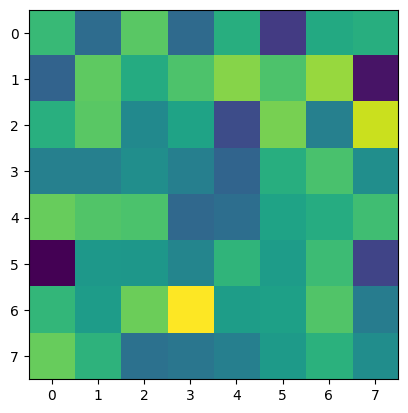

(65,)
297
pixel0000    297
pixel0001    166
pixel0002    325
pixel0003    163
pixel0004    278
            ... 
pixel0060    198
pixel0061    245
pixel0062    283
pixel0063    222
label          2
Name: 0, Length: 65, dtype: int64


In [602]:
def disp_img(data_vec, colorbar=False):
    # Handle the cases of whether the label for an image is provided or not
    if math.sqrt(np.size(data_vec)) != int(math.sqrt(np.size(data_vec))):
        img_label = data_vec[-1]
        img_vec = data_vec[0:-1]
    else:
        img_vec = data_vec

    size = np.size(img_vec)
    dimension = int(math.sqrt(size))

    img_mat = np.reshape(np.array(img_vec), (dimension, dimension))

    plt.imshow(img_mat)
    if colorbar:
        plt.colorbar()
    plt.show()


img_number = 0 # Index of a particular data image
data_vec = df.loc[img_number]

disp_img(data_vec)

print(data_vec.shape)
print(data_vec[0])
print(data_vec)

## Count occurences of labels

Count the number of data images corresponding to each label.

In [603]:
label = df['label']
uniq_label, counts_label = np.unique(label, return_counts=True)

# Each tuple will contain a label and the number of images with the same label
# [(label, #occurences), ..]
occurences = list(zip(uniq_label, counts_label))
print(occurences)

num_cath = len(uniq_label)

[(0, 327), (1, 514), (2, 1099), (3, 115), (4, 6705), (5, 142), (6, 1113)]


# Partition the images into the different classes
Create a list of nested lists. Each nested list represents a label and contains the indices of all data images with the same label. E.g. img_index_group[2] contains all images for label 2.

In [604]:
# List of 7 nested lists (for each diagnostical categorie)
# The ith nested list contains the indices of all images, which correspond to label i
# E.g. img_index_group[2] contains all images for label 2
img_index_group = []

for i in range(num_cath):
    img_index_group.append([])
    for j in range(df.shape[0]):
        if df['label'][j] == i:
            img_index_group[i].append(j)


# Output would exceed the size limit
# print(img_index_group)

# For debugging purposes
# print(list((i, len(img_index_group[i])) for i in range(len(img_index_group))))

# Splitting into training and testing data

In [605]:
training_split = 0.9                #Percentage of Data used for training
img_index_group_split = []          #Same as img_index_group but every nested list is split into two lists: first is list for training, second is list for testing

for i in range(num_cath):
    random.shuffle(img_index_group[i])
    split_point = round(len(img_index_group[i])*training_split)
    img_index_group_split.append([img_index_group[i][:split_point], img_index_group[i][split_point:]])
    
    #print(i)
    #print(len(img_index_group_split[i][0]))
    #print(len(img_index_group_split[i][1]))

print(img_index_group_split)

[[[9741, 9902, 9788, 9738, 10006, 9891, 9985, 9966, 9727, 9901, 9725, 9925, 9827, 9740, 9991, 9689, 9964, 9739, 9726, 9784, 9880, 9761, 9888, 9918, 9834, 9881, 9735, 9953, 9829, 9864, 9823, 9938, 9768, 9915, 9696, 9965, 9984, 9949, 9963, 9722, 9886, 9801, 9897, 9972, 9852, 9873, 10000, 9992, 9927, 9975, 9715, 9978, 9691, 10012, 9767, 9723, 9950, 9842, 10004, 9838, 9857, 9716, 9730, 9698, 9702, 9758, 9763, 9709, 9831, 9941, 9847, 9711, 9903, 9995, 9912, 9690, 9935, 9989, 9774, 9955, 9808, 10002, 9939, 9942, 9762, 9929, 9853, 9993, 9782, 9932, 9731, 9778, 9804, 9974, 9787, 9870, 9817, 9704, 9946, 9795, 9892, 9981, 9868, 9830, 9815, 9828, 9967, 9877, 9700, 9867, 9707, 9862, 9772, 9943, 9969, 9850, 9887, 9796, 9820, 9818, 9990, 9904, 9825, 9833, 9898, 9724, 9800, 9799, 9752, 9813, 9759, 9751, 9921, 9687, 9878, 9777, 9900, 9919, 9954, 9844, 10010, 9806, 9914, 9909, 9794, 9708, 9753, 9851, 9896, 9906, 9948, 9846, 9793, 9996, 9728, 9879, 9874, 9957, 9697, 9757, 9742, 9999, 9705, 9781, 9718, 9

## Merging the different training data sets into one

In [606]:
df_train = pd.concat((df.iloc[img_index_group_split[i][0]] for i in range(num_cath)))
#df_train.sort_index(axis=0, inplace=True)
print(df_train)

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
9741         152        162        173        167        146        139   
9902         128        178        176        173        166        170   
9788         200        210        212        194        195        211   
9738         155        174        186        189        183        180   
10006        172        194        203        195        189        190   
...          ...        ...        ...        ...        ...        ...   
1493           0         97        105         52        141         98   
1327         -33        111        112         32        206         45   
2212         -71         89         29        -39        114         32   
2254         366        280        264        328        169        290   
1805        -164         53         81         31        173         91   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0055  pixel0056  \
9741         132   

## K-Means Clustering

In [607]:
def calcSqDistances(data, Kmus):
    return ((-2 * data.dot(Kmus.T) + np.sum(np.multiply(Kmus,Kmus), axis=1).T).T + np.sum(np.multiply(data, data), axis=1)).T


def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m]


def recalcMus(data, Rnk):
    return (np.divide(data.T.dot(Rnk), np.sum(Rnk, axis=0))).T



classes = num_cath # Number of diagnostical categories
max_iterations = 10000000


images = df_train.to_numpy()
# Remove the labels
images = images[:, 0:-1]  # arr: Shape: (#images, #pixels)

n = images.shape[0]
dim = images.shape[1]

# Initialize cluster centers by randomly picking points from the data
rndinds = np.random.permutation(n)
k_mus = images[rndinds[:classes]]


for iter in range(max_iterations):
    sqDmat = calcSqDistances(images, k_mus)
    rank = determineRnk(sqDmat)
    k_mus_old = k_mus
    k_mus = recalcMus(images, rank)

    if sum(abs(k_mus_old.flatten() - k_mus.flatten())) < 1e-6:
        break


# for i in range(classes):
#     disp_img(k_mus[i])

## Calculating the actual means of each cathegorys training data

In [608]:
mean = []

for i in range(num_cath):
    mean.append(np.mean(df_train.loc[img_index_group_split[i][0]].iloc[:, :-1], axis=0))

    #print(mean[i])

## Compare the computed means with the actual means
The mean images computed using the K-means algorithm are on the lefthand side of each plot. The actual means for each label are on the righthand side.

This is just a random pairing and not matched yet

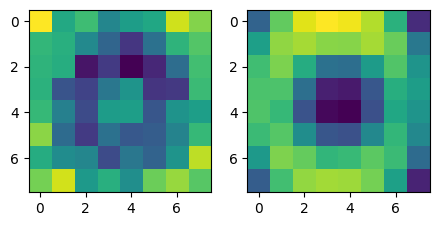

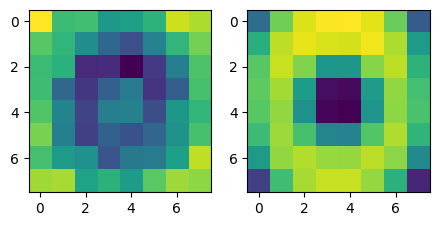

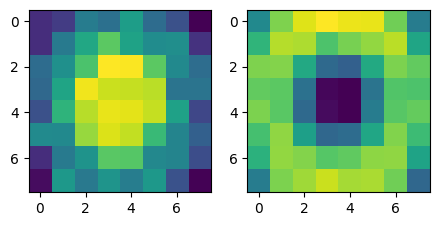

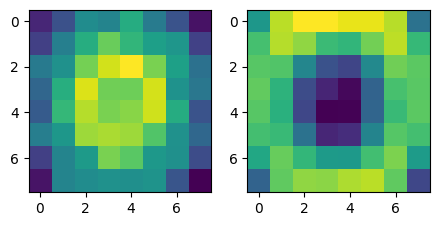

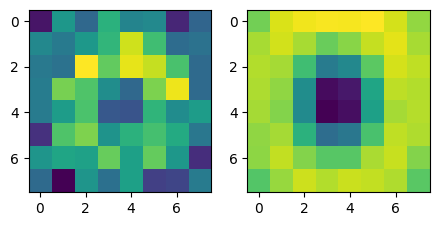

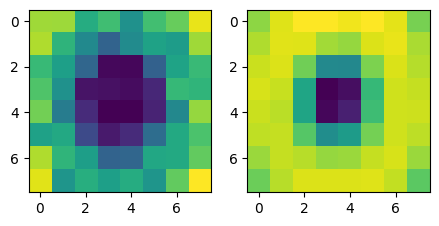

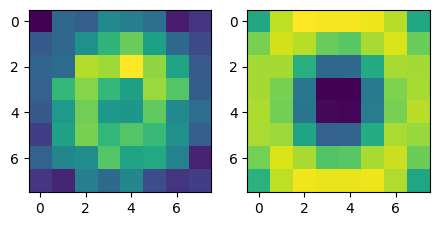

In [609]:
size = int(math.sqrt(len((k_mus[0]))))
for i in range(num_cath):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(np.reshape(k_mus[i], (size, size)))
    plt.subplot(1, 3, 2)
    disp_img(mean[i])

## Matching the calculated clusters to the different diagnosis

Calculating the MSE for every calculated mean with every actual mean

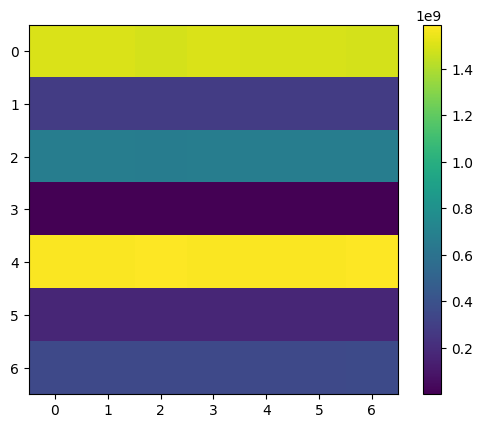

In [610]:
MSE = np.empty([len(mean), len(k_mus)])
for i in range(len(mean)):
    for j in range(len(k_mus)):
        MSE[j][i] = ((mean[i] - k_mus[j]).transpose().dot(mean[i] - k_mus[j]))

df_MSE = pd.DataFrame(MSE)

disp_img(df_MSE, colorbar=True)

Function to Calculate the Mapping from the MSE Martix

Searches for a Mapping between the k_mus and the real means under to condition to minimize the total MSE of that mapping

To achieve a bijective mapping it lets a random k_mus "pick" its cheapest map and the removes it from the pool of possibilities for the other k-mus

Then the next random k_mus "picks" from the remaining pool of possibilities until all k_mus have "picked" their mapping

To try to achieve a global MSE Minimum it iterates iter times over this random selection process and picks the mapping with the lowest cost

Returns a vector $$x = [a, b, c, d, e, f, g]$$ with the mapping, meaning $$k_{mus}[i] \rightarrow mean[x[i]]$$

In [611]:
def find_mapping(df_MSE, iter=1000):     
    mappings = {}
    mappings['Map'] = []
    mappings['Cost'] = []
    for i in range(iter):
        mapping = []
        mean_list = list(range(len(mean)))
        mus_list = list(range(len(k_mus)))

        while len(mus_list) != 0:
            i = random.choice(mus_list)
            min_idx = df_MSE.iloc[i][mean_list].idxmin()
            mapping.append(min_idx)
            mean_list.remove(min_idx)
            mus_list.remove(i)

        cost = 0
        for i in range(len(mapping)):
            cost = cost + MSE[i][mapping[i]]

        mappings['Map'].append(mapping)
        mappings['Cost'].append(cost)

    min_index = mappings['Cost'].index(min(mappings['Cost']))

    df_matching = mappings['Map'][min_index]

    return mappings['Map'][min_index]

Calling the find_mapping function and displaying the real mean and corresponding k_mus next to each other

[6, 5, 2, 4, 1, 3, 0]


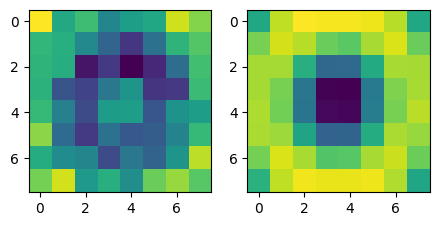

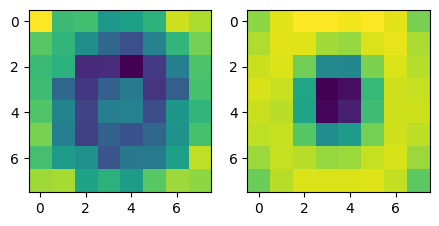

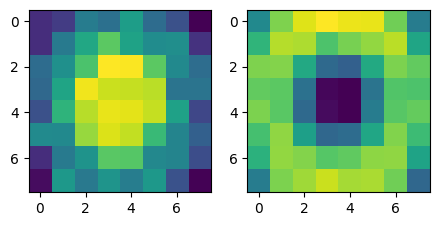

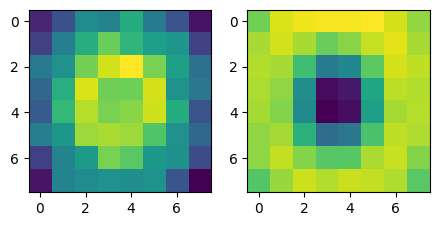

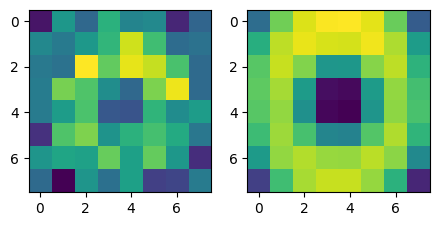

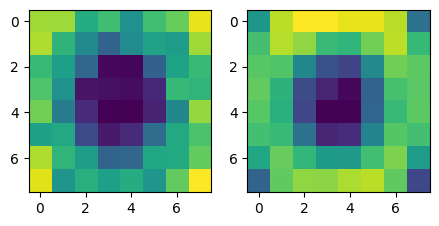

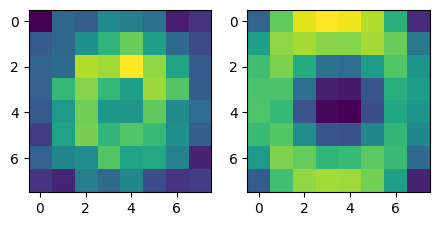

In [612]:
df_matching = find_mapping(df_MSE)
print(df_matching)

for i in range(num_cath):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(np.reshape(k_mus[i], (size, size)))
    plt.subplot(1, 3, 2)
    disp_img(mean[df_matching[i]])

## Feeding the training data and calculating the accuracy

In [613]:
def evaluate(): 
    right = 0
    wrong = 0

    for k in range(num_cath):
        for j in range(len(df.iloc[img_index_group_split[k][1]])):
            img = df.iloc[img_index_group_split[k][1]].iloc[j]
            img_label = img[-1]
            img_vec = img[0:-1]

            error = np.empty(num_cath)
            for i in range(num_cath):
                error[i] = (k_mus[i] - img_vec).transpose().dot(k_mus[i] - img_vec)

            idx_mu = error.argmin()
            guess = df_matching[idx_mu]
            
            if guess == img_label:
                right += 1
            else:
                wrong += 1

    accuracy = right/(right+wrong)

    return accuracy

print(evaluate())

0.15884115884115885
